<a href="https://colab.research.google.com/github/badstyle-goodstyle/study_python/blob/main/study_python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Предисловие:
*   **Выполнил**: Яковцев Дмитрий
*   **Группа**: 4.206М-3
*   **Задача**:  №3 (Вариант А)

# **Блок**: pandas

### 1.1. среднее значение и медиану бега на 100 метров (мин, сек) по каждой возрастной группе (год рождения есть) по девочкам и мальчикам

In [ ]:
import pandas as pd
import shutil

shutil.copy("drive/MyDrive/study_python/competition_1.csv", "competition.csv")

'competition.csv'

In [ ]:
df = pd.read_csv("competition.csv", sep=";")
df.columns

Index(['Фамилия', 'Имя', 'Пол', 'Год рождения', 'Бег 1000 метров, мин. и сек.',
       'Бег 30 метров, сек.', 'Прыжок в длину с места, см '],
      dtype='object')

In [ ]:
df = df.rename(columns={'Фамилия': 'lastname',
                        'Имя':'firstname',
                        'Пол':'sex',
                        'Год рождения': 'year',
                        'Бег 1000 метров, мин. и сек.': 'running1000_time',
                        'Бег 30 метров, сек.': 'running30_time',
                        'Прыжок в длину с места, см ': 'jumping_height'})
df.head(10)

,lastname,firstname,sex,year,running1000_time,running30_time,jumping_height
0,Абдуллаев,Денис,м,1998,"3,42","4,72",188
1,Абдуллаев,Темур,м,1999,"5,12","5,63",187
2,Абраменцев,Владислав,м,1997,"5,52","5,42",223
3,Абсалямов,Илья,м,1999,"5,43","4,92",237
4,Авдонин,Александр,м,1998,"4,38","4,71",219
5,Авдышева,Елена,ж,1999,"4,53","5,3",224
6,Авдюкова,Александра,ж,1998,"5,02","5,3",205
7,Аверин,Дмитрий,м,1997,"4,18","5,3",184
8,Автайкина,Анна,ж,1997,"3,57","4,27",185
9,Агасарян,Александр,м,1999,"4,37","5,39",181


In [ ]:
df2 = df.replace({'running1000_time': ',', 'running30_time': ','}, {'running1000_time': '.', 'running30_time': '.'}, regex=True)
# convert just columns "running1000_time" and "running30_time" to numeric type
df2[["running1000_time", "running30_time"]] = df2[["running1000_time", "running30_time"]].apply(pd.to_numeric)
df2 = df2.assign(running1000_time = lambda x: round((divmod(x['running1000_time'], 1)[0]) * 60 + (divmod(x['running1000_time'], 1)[1]) * 5/3, 2))
df2.head(10)

,lastname,firstname,sex,year,running1000_time,running30_time,jumping_height
0,Абдуллаев,Денис,м,1998,180.70,4.72,188
1,Абдуллаев,Темур,м,1999,300.20,5.63,187
2,Абраменцев,Владислав,м,1997,300.87,5.42,223
3,Абсалямов,Илья,м,1999,300.72,4.92,237
4,Авдонин,Александр,м,1998,240.63,4.71,219
5,Авдышева,Елена,ж,1999,240.88,5.30,224
6,Авдюкова,Александра,ж,1998,300.03,5.30,205
7,Аверин,Дмитрий,м,1997,240.30,5.30,184
8,Автайкина,Анна,ж,1997,180.95,4.27,185
9,Агасарян,Александр,м,1999,240.62,5.39,181


In [ ]:
(df2.rename(columns={'year': 'год', 'sex': 'пол'})
  .groupby(['год', 'пол'])
  .agg({'running1000_time': ['mean', 'median']})
  .rename(columns={'running1000_time': 'Бег, 1000 метров (по группам, в секундах)', 'mean': 'среднее (секунд)', 'median': 'медиана (секунд)'})
)

Бег, 1000 метров (по группам, в секундах)                 
                                  среднее (секунд) медиана (секунд)
год  пол                                                           
1996 ж                                  252.964809           240.75
     м                                  256.536774           240.78
1997 ж                                  253.060432           240.63
     м                                  256.202812           240.80
1998 ж                                  259.260854           240.87
     м                                  257.707473           240.72
1999 ж                                  258.039937           240.87
     м                                  255.409794           240.78

### 1.2. определить победителей (фамилии и имена детей) в каждой возрастной группе по мальчикам и по девочкам (3 первых места) по каждому виду. Учесть, что победителей может быть больше 3-х, так как результаты могут совпадать

In [ ]:
import numpy as np
# df3 = df2.nsmallest(100, 'running1000_time')[['lastname', 'firstname', 'running1000_time']]

def find_top3_time(x, discipline: str, option: str):
  data = set(x[discipline])
  tmp_set = set()
  if option == 'min':
    top1_time = min(data)
    tmp_set.add(top1_time)
    top2_time = min(data.difference(tmp_set))
    tmp_set.add(top2_time)
    top3_time = min(data.difference(tmp_set))
  elif option == 'max':
    top1_time = max(data)
    tmp_set.add(top1_time)
    top2_time = max(data.difference(tmp_set))
    tmp_set.add(top2_time)
    top3_time = max(data.difference(tmp_set))
  else:
    top1_time = top2_time = top3_time = max(data)
  return top1_time, top2_time, top3_time

def find_top3_names(x, discipline, option):
  top3_times = find_top3_time(x, discipline, option)
  return (x[(x[discipline] == top3_times[0]) | 
          (x[discipline] == top3_times[1]) | 
          (x[discipline] == top3_times[2])]
        [['lastname', 'firstname', 'year', discipline]]
        .sort_values(by=[discipline, 'lastname']))

def find_top3_places(x, discipline, option):
  top3_times = find_top3_time(x, discipline, option)
  conditions = [
    (x[discipline] == top3_times[0]),
    (x[discipline] == top3_times[1]),
    (x[discipline] == top3_times[2])
  ]
  # create a list of the values we want to assign for each condition
  values = ['I', 'II', 'III']

  # create a new column and use np.select to assign values to it using our lists as arguments
  x['place'] = np.select(conditions, values)
  

In [ ]:
def print_leaderboard(main_obj, discipline, sex):
  if discipline == 'running1000_time':
    option = 'min'
  elif discipline == 'running30_time':
    option = 'min'
  elif discipline == 'jumping_height':
    option = 'max'
  else:
    raise(Exception('Something went wrong'))
  
  df_obj = find_top3_names(main_obj[main_obj['sex'] == sex], discipline, option)
  find_top3_places(df_obj, discipline, option)
  df_obj = df_obj.rename(columns={
      'lastname': 'Фамилия', 
      'firstname': 'Имя', 
      'year': 'Год',
      'running1000_time': 'Бег 1000м. (сек.)', 
      'running30_time': 'Бег 30м. (сек.)',
      'jumping_height': 'Прыжки в длину (см)',
      'place': 'Место'})
  print(df_obj)

In [ ]:
print("Выборка по годам: ", set(df2["year"]), "\n")
df_1996 = df2[df2["year"] == 1996]

print('Мужчины (бег, 1 км, 1996 год):')
print_leaderboard(df_1996, 'running1000_time', 'м')
print('\nЖенщины (бег, 1км, 1996 год):')
print_leaderboard(df_1996, 'running1000_time', 'ж')

Выборка по годам:  {1996, 1997, 1998, 1999} 

Мужчины (бег, 1 км, 1996 год):
      Фамилия     Имя   Год  Бег 1000м. (сек.) Место
144    Бурсов  Никита  1996             180.47     I
101  Бессонов  Кирилл  1996             180.50    II
129   Бохонов   Антон  1996             180.55   III

Женщины (бег, 1км, 1996 год):
          Фамилия        Имя   Год  Бег 1000м. (сек.) Место
426       Коркина  Анастасия  1996             180.47     I
333       Иванова       Анна  1996             180.50    II
849  Трапезникова      Мария  1996             180.55   III


In [ ]:
print('Мужчины (бег, 30 м, общий зачет):')
print_leaderboard(df2, 'running30_time', 'м')
print('\nЖенщины (бег, 30 м, общий зачет):')
print_leaderboard(df2, 'running30_time', 'ж')

Мужчины (бег, 30 м, общий зачет):
      Фамилия        Имя   Год  Бег 30м. (сек.) Место
245   Демидов      Антон  1997             4.01     I
864   Уваркин    Тимофей  1999             4.01     I
206  Горбатюк      Антон  1997             4.02    II
482  Курбатов  Александр  1996             4.02    II
817  Стукалов      Борис  1998             4.02    II
148    Бывших      Рубен  1997             4.03   III
676  Платонов   Гахраман  1996             4.03   III

Женщины (бег, 30 м, общий зачет):
       Фамилия        Имя   Год  Бег 30м. (сек.) Место
22     Алимова  Екатерина  1997             4.00     I
590   Морозова       Юлия  1997             4.01    II
381  Керенцева    Наталия  1998             4.02   III
784  Скоберева      Мария  1996             4.02   III
919  Чегодаева      Алина  1996             4.02   III


In [ ]:
df_1999 = df2[df2["year"] == 1999]
print('Мужчины (прыжки, 1999 год):')
print_leaderboard(df_1999, 'jumping_height', 'м')
print('\nЖенщины (прыжки, 1999 год):')
print_leaderboard(df_1999, 'jumping_height', 'ж')

Мужчины (прыжки, 1999 год):
       Фамилия      Имя   Год  Прыжки в длину (см) Место
285    Ермаков  Николай  1999                  234   III
979     Шумари  Алексей  1999                  235    II
3    Абсалямов     Илья  1999                  237     I
690      Попов    Павел  1999                  237     I

Женщины (прыжки, 1999 год):
      Фамилия     Имя   Год  Прыжки в длину (см) Место
42   Арбузова   Мария  1999                  234   III
753  Сафонова  Полина  1999                  235    II
119   Бойцова   Ольга  1999                  236     I


### 1.3. определить в каждой возрастной группе девочек, которые по трём видам (по всем) испытаний входят в ТОП5

In [ ]:
def find_top5_time(x, discipline: str, option: str):
  data = set(x[discipline])
  tmp_set = set()
  if option == 'min':
    top1_time = min(data)
    tmp_set.add(top1_time)
    top2_time = min(data.difference(tmp_set))
    tmp_set.add(top2_time)
    top3_time = min(data.difference(tmp_set))
    tmp_set.add(top3_time)
    top4_time = min(data.difference(tmp_set))
    tmp_set.add(top4_time)
    top5_time = min(data.difference(tmp_set))
  elif option == 'max':
    top1_time = max(data)
    tmp_set.add(top1_time)
    top2_time = max(data.difference(tmp_set))
    tmp_set.add(top2_time)
    top3_time = max(data.difference(tmp_set))
    tmp_set.add(top3_time)
    top4_time = max(data.difference(tmp_set))
    tmp_set.add(top4_time)
    top5_time = max(data.difference(tmp_set))
  else:
    top1_time = top2_time = top3_time = top4_time = top5_time= max(data)
  return top1_time, top2_time, top3_time, top4_time, top5_time

def find_top5_names(x, discipline, option):
  top5_times = find_top5_time(x, discipline, option)
  return (x[(x[discipline] == top5_times[0]) | 
          (x[discipline] == top5_times[1]) | 
          (x[discipline] == top5_times[2]) |
          (x[discipline] == top5_times[3]) |
          (x[discipline] == top5_times[4])]
        [['lastname', 'firstname', 'year', discipline]]
        .sort_values(by=[discipline, 'lastname']))

def find_top5_places(x, discipline, option):
  top5_times = find_top5_time(x, discipline, option)
  conditions = [
    (x[discipline] == top5_times[0]),
    (x[discipline] == top5_times[1]),
    (x[discipline] == top5_times[2]),
    (x[discipline] == top5_times[3]),
    (x[discipline] == top5_times[4])
  ]
  # create a list of the values we want to assign for each condition
  values = ['I', 'II', 'III', 'IV', 'V']

  # create a new column and use np.select to assign values to it using our lists as arguments
  x['place'] = np.select(conditions, values)

In [ ]:
def get_leaderboard_5places(main_obj, discipline, sex):
  if discipline == 'running1000_time':
    option = 'min'
  elif discipline == 'running30_time':
    option = 'min'
  elif discipline == 'jumping_height':
    option = 'max'
  else:
    raise(Exception('Something went wrong'))
  
  df_obj = find_top5_names(main_obj[main_obj['sex'] == sex], discipline, option)
  find_top5_places(df_obj, discipline, option)
  return df_obj

In [ ]:
df_1996_5places = df2[df2["year"] == 1996]
df_1997_5places = df2[df2["year"] == 1997]
df_1998_5places = df2[df2["year"] == 1998]
df_1999_5places = df2[df2["year"] == 1999]
df5_jh = [
    get_leaderboard_5places(df_1996_5places, 'jumping_height', 'ж'),
    get_leaderboard_5places(df_1997_5places, 'jumping_height', 'ж'),
    get_leaderboard_5places(df_1998_5places, 'jumping_height', 'ж'),
    get_leaderboard_5places(df_1999_5places, 'jumping_height', 'ж')
    ]
df5_r1000 = [
    get_leaderboard_5places(df_1996_5places, 'running1000_time', 'ж'),
    get_leaderboard_5places(df_1997_5places, 'running1000_time', 'ж'),
    get_leaderboard_5places(df_1998_5places, 'running1000_time', 'ж'),
    get_leaderboard_5places(df_1999_5places, 'running1000_time', 'ж')
    ]
df5_r30 = [
    get_leaderboard_5places(df_1996_5places, 'running30_time', 'ж'),
    get_leaderboard_5places(df_1997_5places, 'running30_time', 'ж'),
    get_leaderboard_5places(df_1998_5places, 'running30_time', 'ж'),
    get_leaderboard_5places(df_1999_5places, 'running30_time', 'ж')
    ]


print('\nЖенщины (прыжки):')
for data in df5_jh:
  print(data, '\n')

print('\nЖенщины (бег, 1 км):')
for data in df5_r1000:
  print(data, '\n')

print('\nЖенщины (бег, 30 м):')
for data in df5_r30:
  print(data, '\n')


Женщины (прыжки):
        lastname firstname  year  jumping_height place
293     Ефремова     Ирина  1996             230     V
792     Смирнова      Юлия  1996             231    IV
302    Журавлева      Алла  1996             234   III
307  Загидуллина     Лейли  1996             235    II
816    Стукалина    Оксана  1996             235    II
512      Логвина     Ирина  1996             236     I 

         lastname firstname  year  jumping_height place
419       Коннова  Светлана  1997             229     V
127     Бородкина   Наталья  1997             231    IV
243         Деева    Ксения  1997             232   III
811     Степанова     Мария  1997             233    II
111       Боброва   Наталья  1997             234     I
697  Приказчикова     Дарья  1997             234     I 

      lastname   firstname  year  jumping_height place
90    Бачурина     Евгения  1998             229     V
500   Леньшина  Александра  1998             229     V
977   Шулыгина  Александра  1998   

In [ ]:
k = 0
while (k< len(df5_jh)):
  df6 = df5_jh[k].merge(df5_r1000[k].set_index('lastname'), on='lastname')
  df7 = df5_jh[k].merge(df5_r30[k].set_index('lastname'), on='lastname')
  df8 = df5_r30[k].merge(df5_r1000[k].set_index('lastname'), on='lastname')
  if not df6.empty:
    print(df6)
  if not df7.empty:
    print(df7)
  if not df8.empty:
    print(df8)
  k+=1

# df5_jh[0].set_index('lastname').join(df5_r1000[0].set_index('lastname'))
print('У меня даже по 2 категориям девочки не совпадают...')

    lastname firstname_x  year_x  jumping_height place_x firstname_y  year_y  \
0  Журавлева        Алла    1996             234     III        Алла    1996   

   running30_time place_y  
0            4.24      IV  
   lastname firstname_x  year_x  jumping_height place_x firstname_y  year_y  \
0  Русакова   Екатерина    1999             233      IV       Ольга    1999   

   running1000_time place_y  
0            180.58      IV  
У меня даже по 2 категориям девочки не совпадают...


# **Блок**: matplotlib

### Создать две Фигуры для графиков, состоящий из нескольких областей (контейнеров). Тип и решаемая задача – любые

In [581]:
available_years = list(set(df2["year"]))
my_obj = {}
for next_year in available_years:
  my_obj[next_year] = {
    "boys": df2[(df2["year"] == next_year) & (df2["sex"] == 'м')].count()["year"],
    "girls": df2[(df2["year"] == next_year) & (df2["sex"] == 'ж')].count()["year"],
    "r1000_mean": round(df2[(df2["year"] == next_year)].mean(numeric_only=True)["running1000_time"], 2),
    "r30_mean": round(df2[(df2["year"] == next_year)].mean(numeric_only=True)["running30_time"], 2),
    "jh_mean": round(df2[(df2["year"] == next_year)].mean(numeric_only=True)["jumping_height"], 2)
  }

my_df = pd.DataFrame(my_obj).T
print(my_df)
print(my_obj)

       boys  girls  r1000_mean  r30_mean  jh_mean
1996  124.0  131.0      254.70      5.07   205.53
1997   96.0  139.0      254.34      5.16   203.83
1998   91.0  164.0      258.71      5.09   203.29
1999   97.0  158.0      257.04      5.25   205.02
{1996: {'boys': 124, 'girls': 131, 'r1000_mean': 254.7, 'r30_mean': 5.07, 'jh_mean': 205.53}, 1997: {'boys': 96, 'girls': 139, 'r1000_mean': 254.34, 'r30_mean': 5.16, 'jh_mean': 203.83}, 1998: {'boys': 91, 'girls': 164, 'r1000_mean': 258.71, 'r30_mean': 5.09, 'jh_mean': 203.29}, 1999: {'boys': 97, 'girls': 158, 'r1000_mean': 257.04, 'r30_mean': 5.25, 'jh_mean': 205.02}}


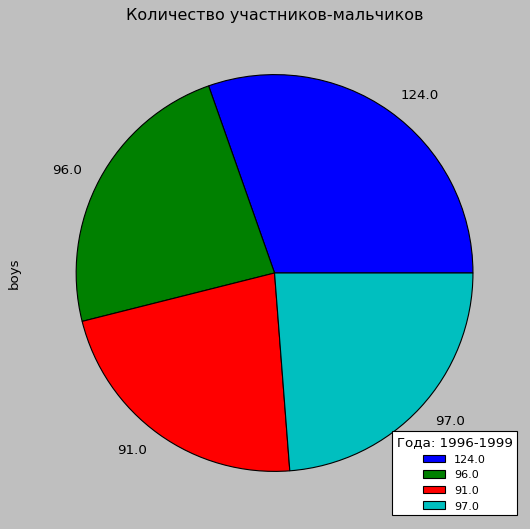

In [594]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('classic')
my_df.plot(kind='pie', y = "boys", labels = my_df["boys"], figsize=(8, 8), title = "Количество участников-мальчиков")
plt.legend(fontsize=10, title='Года: 1996-1999', loc="lower right")

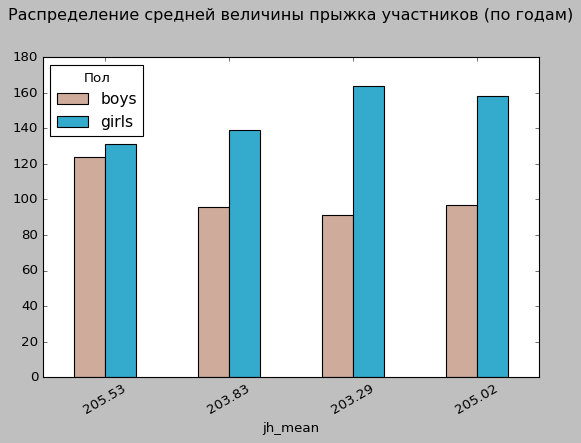

In [606]:
my_df.plot.bar(y = ["boys", "girls"], x = 'jh_mean', figsize=(8, 5), color = ["#cfab9b","#34abcc"])
plt.xticks(rotation=30) # поворот подписей по оси X
plt.legend(fontsize=14, title='Пол', loc="upper left") # параметры легенд
plt.title("Распределение средней величины прыжка участников (по годам)", y= 1.1)
plt.show()

Создать две Фигуры для графиков, состоящий из нескольких областей (контейнеров). Тип и
решаемая задача – любые

# **Блок**: seaborn

### Создать три скрипичных диаграммы

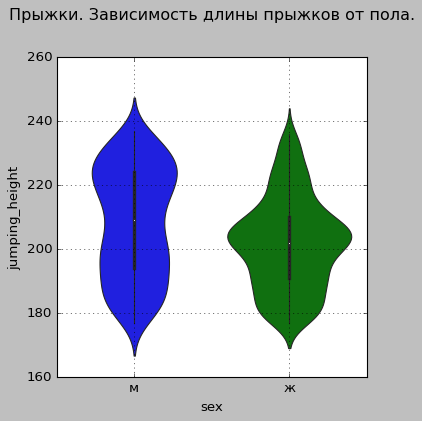

In [616]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.violinplot(x="sex", y="jumping_height", data=df2)
plt.title("Прыжки. Зависимость длины прыжков от пола.", y= 1.1)
plt.grid(True)
plt.show()

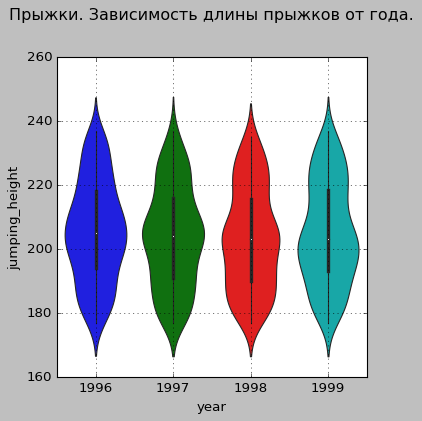

In [617]:
plt.figure(figsize=(5,5))
sns.violinplot(x="year", y="jumping_height", data=df2)
plt.title("Прыжки. Зависимость длины прыжков от года.", y= 1.1)
plt.grid(True)
plt.show()

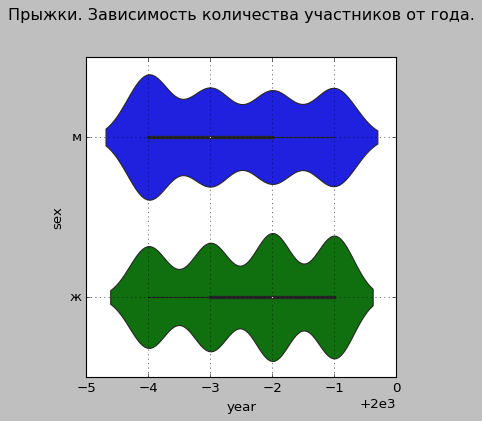

In [619]:
plt.figure(figsize=(5,5))
sns.violinplot(x="year", y="sex", data=df2)
plt.title("Прыжки. Зависимость количества участников от года.", y= 1.1)
plt.grid(True)
plt.show()